Mounting drive

Importing the basic libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir("/content/drive/My Drive/CA684_Assignment_Data")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!ls

dev-set				     Memorability-Tutorial.ipynb
dev-set_aesthetic-features.zip	     Predictions_with_captions.ipynb
dev-set.zip			     sources.zip
load_features_barebones.ipynb	     test-set
MemorabilityDataset2018_license.txt


In [0]:
#importing the ground truth file
ground_truth = pd.read_csv('dev-set/dev-set_ground-truth.csv')

In [5]:
ground_truth.describe()

,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.860243,36.291500,0.778942,12.764667
std,0.080655,8.356285,0.144692,3.544815
min,0.388000,30.000000,0.000000,9.000000
25%,0.811000,33.000000,0.700000,10.000000
50%,0.867000,34.000000,0.800000,12.000000
75%,0.923000,34.000000,0.900000,14.000000
max,0.989000,100.000000,1.000000,40.000000


In [6]:
ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


# Starting with caption feature:
Creating  function to read caption file and storing in data frame

In [7]:
# load labels and captions
def read_caps(fname):
    """Load the captions into a dataframe"""
    vn = []
    cap = []
    df = pd.DataFrame();
    with open(fname) as f:
        for line in f:
            pairs = line.split()
            vn.append(pairs[0])
            cap.append(pairs[1])
        df['video']=vn
        df['caption']=cap
    return df


# load the captions
cap_path = './dev-set/dev-set_video-captions.txt'
df_cap=read_caps(cap_path)
df_cap.head()

,video,caption
0,video3.webm,blonde-woman-is-massaged-tilt-down
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,khr-gangsters
3,video8.webm,medical-helicopter-hovers-at-airport
4,video10.webm,couple-relaxing-on-picnic-crane-shot


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Creating text pre-process function  to splitting caption, remove stop words, lower case conversion.

In [0]:
import string
from nltk.corpus import stopwords

# creating text pre-process function
def text_process(mess):
  """
  1. Splitting the caption
  2. remove stopwords
  3. convert string to lower case
  4. return string
  """
  return ' '.join([word for word in mess.split('-') if word.lower() not in stopwords.words("english")]).lower()

In [10]:
df_cap['clean_caption']= df_cap.caption.apply(text_process)
df_cap.head()

,video,caption,clean_caption
0,video3.webm,blonde-woman-is-massaged-tilt-down,blonde woman massaged tilt
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot,roulette table spinning ball closeup shot
2,video6.webm,khr-gangsters,khr gangsters
3,video8.webm,medical-helicopter-hovers-at-airport,medical helicopter hovers airport
4,video10.webm,couple-relaxing-on-picnic-crane-shot,couple relaxing picnic crane shot


**Features such as caption length, noun count, has been added in dataframe**

In [11]:
#creating the caption length column for the data frame
df_cap['caption_len']= df_cap['clean_caption'].apply(len)
df_cap.head()

,video,caption,clean_caption,caption_len
0,video3.webm,blonde-woman-is-massaged-tilt-down,blonde woman massaged tilt,26
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot,roulette table spinning ball closeup shot,41
2,video6.webm,khr-gangsters,khr gangsters,13
3,video8.webm,medical-helicopter-hovers-at-airport,medical helicopter hovers airport,33
4,video10.webm,couple-relaxing-on-picnic-crane-shot,couple relaxing picnic crane shot,33


In [12]:
#downloading the necessary library to import TextBlob library 
nltk.download('brown')
nltk.download('punkt')
from textblob import TextBlob

#function to identify the count of noun
def identify_noun_count(sentence):
  blob = TextBlob(sentence)
  return len(blob.noun_phrases)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
#creating noun count column for the data frame
df_cap['noun_count'] = df_cap['clean_caption'].apply(identify_noun_count)
df_cap.head()

,video,caption,clean_caption,caption_len,noun_count
0,video3.webm,blonde-woman-is-massaged-tilt-down,blonde woman massaged tilt,26,1
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot,roulette table spinning ball closeup shot,41,2
2,video6.webm,khr-gangsters,khr gangsters,13,1
3,video8.webm,medical-helicopter-hovers-at-airport,medical helicopter hovers airport,33,1
4,video10.webm,couple-relaxing-on-picnic-crane-shot,couple relaxing picnic crane shot,33,1


Merging caption dataframe with ground truth file

In [14]:
final = df_cap.merge(ground_truth, on='video')
final.head()

,video,caption,clean_caption,caption_len,noun_count,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,blonde-woman-is-massaged-tilt-down,blonde woman massaged tilt,26,1,0.924,34,0.846,13
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot,roulette table spinning ball closeup shot,41,2,0.923,33,0.667,12
2,video6.webm,khr-gangsters,khr gangsters,13,1,0.863,33,0.700,10
3,video8.webm,medical-helicopter-hovers-at-airport,medical helicopter hovers airport,33,1,0.922,33,0.818,11
4,video10.webm,couple-relaxing-on-picnic-crane-shot,couple relaxing picnic crane shot,33,1,0.950,34,0.900,10


Checking the correlation if any

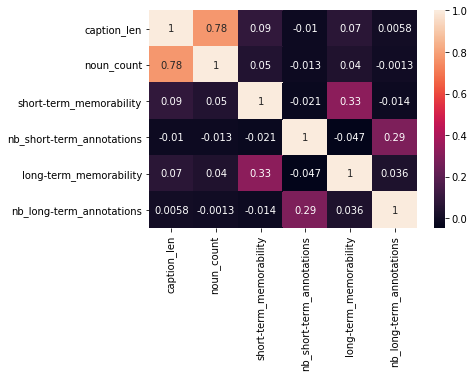

In [15]:
sns.heatmap(final[['caption_len', 'noun_count', 'short-term_memorability', 'nb_short-term_annotations','long-term_memorability', 'nb_long-term_annotations']].corr(), annot=True)

Plotting the wordcloud

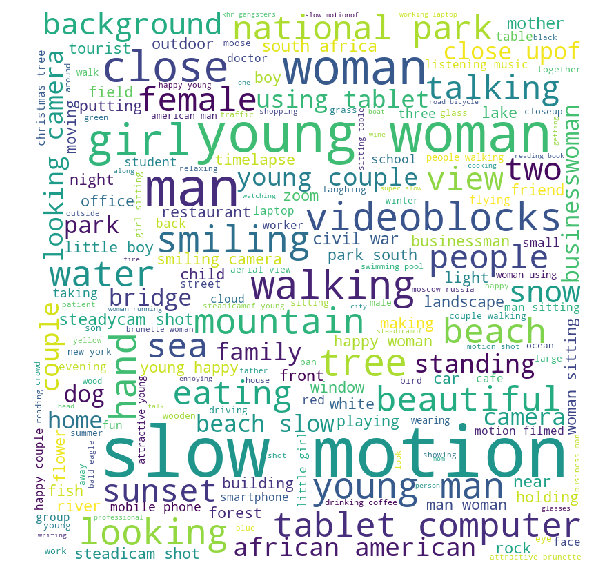

In [16]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_cap.clean_caption: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Creating the get score function to calculate the spearmann's correlation coefficient, referred from [get_score](https://colab.research.google.com/drive/1X7l5MGrDZa2IdMCOxwgILCD5CzHKE8NF#scrollTo=4kEBrl-rNxqQ)

In [0]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

For short-term memorability prediction:

Splitting the data in train, test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final[['clean_caption','caption_len','noun_count','nb_short-term_annotations']], \
                                                    final[['short-term_memorability']].values,\
                                                    test_size=0.2, random_state=101)

Applying count vector to captions

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_caption'])
vectorizer.fit(X_test['clean_caption'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
X_train_vec = vectorizer.transform(X_train['clean_caption'])
X_test_vec= vectorizer.transform(X_test['clean_caption'])

In [21]:
X_train_vec.shape

(4800, 2398)

combining the countvector feature with other features (caption length, noun count)

In [0]:
import scipy as sp

# combining count vector with other caption features
final_train = sp.sparse.hstack((X_train_vec,X_train.drop('clean_caption', axis=1).values), format='csr')
final_test = sp.sparse.hstack((X_test_vec,X_test.drop('clean_caption', axis=1).values), format='csr')

Linear model results for countvector

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(final_train, y_train)
lr_pred= lr.predict(final_test)
Get_score(lr_pred, y_test)

The Spearman's correlation coefficient is: 0.291


Similarly computing the score for long-term prediction:

In [24]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(final[['clean_caption','caption_len','noun_count','nb_long-term_annotations']], \
                                                    final[['long-term_memorability']].values,\
                                                    test_size=0.2, random_state=101)

#applying count vector to caption
vecl = CountVectorizer()
vecl.fit(Xl_train['clean_caption'])
vecl.fit(Xl_test['clean_caption'])
Xl_train_vec = vecl.transform(Xl_train['clean_caption'])
Xl_test_vec= vecl.transform(Xl_test['clean_caption'])

# combining count vector with other caption features
final_train_l = sp.sparse.hstack((Xl_train_vec,Xl_train.drop('clean_caption', axis=1).values), format='csr')
final_test_l = sp.sparse.hstack((Xl_test_vec,Xl_test.drop('clean_caption', axis=1).values), format='csr')

# applying the Linear reression model
lr.fit(final_train_l, yl_train)
lr_pred= lr.predict(final_test_l)
Get_score(lr_pred, yl_test)

The Spearman's correlation coefficient is: 0.091


Now trying the same model with Tfidf vector for short and long term:

Short-Term->

In [25]:
#converting count vector into tf-idf vector 
tf_vectorizer = TfidfTransformer()
tfidf_train_vec = tf_vectorizer.fit(X_train_vec).transform(X_train_vec)
tfidf_test_vec = tf_vectorizer.fit(X_test_vec).transform(X_test_vec)

# combining tf-idf vector with other caption features
final_train = sp.sparse.hstack((tfidf_train_vec,X_train.drop('clean_caption', axis=1).values), format='csr')
final_test = sp.sparse.hstack((tfidf_test_vec,X_test.drop('clean_caption', axis=1).values), format='csr')
final_train.shape

(4800, 2401)

In [26]:
#Applying the linear model to all caption features
lr.fit(final_train, y_train)
lr_pred= lr.predict(final_test)
Get_score(lr_pred, y_test)

The Spearman's correlation coefficient is: 0.317


Long-term ->

In [27]:
#converting count vector into tf-idf vector 
tf_vectorizer_l = TfidfTransformer()
tfidf_train_vec_l = tf_vectorizer_l.fit(Xl_train_vec).transform(Xl_train_vec)
tfidf_test_vec_l = tf_vectorizer_l.fit(Xl_test_vec).transform(Xl_test_vec)

# combining tf-idf vector with other caption features
final_train_l = sp.sparse.hstack((tfidf_train_vec_l,Xl_train.drop('clean_caption', axis=1).values), format='csr')
final_test_l = sp.sparse.hstack((tfidf_test_vec_l,Xl_test.drop('clean_caption', axis=1).values), format='csr')

#Applying the linear model to all caption features
lr.fit(final_train_l, yl_train)
lr_pred_l= lr.predict(final_test_l)
Get_score(lr_pred_l, yl_test)

The Spearman's correlation coefficient is: 0.101


TF-IDF vector has increased the performance for both, long-term and short-term. 

Now applying the Dense Neural Network on combined features:

In [28]:
#importing neural networks library

from keras import Sequential
from keras import layers
from keras import regularizers

Using TensorFlow backend.


In [29]:
#setting the max length for input nodes, which is number of final_train columns
max_len = final_train.shape[1]
max_len

2401

In [30]:
#Defining the layers and various parameters for the neural networks
model = Sequential()

model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0005),input_shape=(max_len,))) # Just your regular densely-connected NN layer.
model.add(layers.Dropout(0.5)) #Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training; helps prevent overfitting.
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [33]:
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(final[['clean_caption','caption_len','noun_count','nb_short-term_annotations', 'nb_long-term_annotations']], \
                                                    final[['short-term_memorability', 'long-term_memorability']].values,\
                                                    test_size=0.2, random_state=101)


# combining tf-idf vector with other caption features
final_train_NN = sp.sparse.hstack((tfidf_train_vec,X_train_NN.drop('clean_caption', axis=1).values), format='csr')
final_test_NN = sp.sparse.hstack((tfidf_test_vec,X_test_NN.drop('clean_caption', axis=1).values), format='csr')


max_len = final_train_NN.shape[1]

#Defining the layers and various parameters for the neural networks
model = Sequential()

model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0005),input_shape=(max_len,))) # Just your regular densely-connected NN layer.
model.add(layers.Dropout(0.5)) #Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training; helps prevent overfitting.
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])


# training the model 
history = model.fit(final_train_NN,y_train_NN,epochs=20,validation_data=(final_test_NN,y_test_NN))

#predicting the scores for validation data
NN_prediction = model.predict(final_test_NN)

Get_score(NN_prediction, y_test_NN)

Instructions for updating:
Use tf.cast instead.
Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 1s 251us/step - loss: 0.0623 - acc: 0.5623 - val_loss: 0.0200 - val_acc: 0.7142
Epoch 2/20
4800/4800 [==============================] - 1s 107us/step - loss: 0.0339 - acc: 0.6192 - val_loss: 0.0156 - val_acc: 0.7142
Epoch 3/20
4800/4800 [==============================] - 1s 107us/step - loss: 0.0238 - acc: 0.6819 - val_loss: 0.0145 - val_acc: 0.7142
Epoch 4/20
4800/4800 [==============================] - 1s 112us/step - loss: 0.0198 - acc: 0.7019 - val_loss: 0.0140 - val_acc: 0.7142
Epoch 5/20
4800/4800 [==============================] - 1s 107us/step - loss: 0.0175 - acc: 0.7025 - val_loss: 0.0137 - val_acc: 0.7142
Epoch 6/20
4800/4800 [==============================] - 1s 108us/step - loss: 0.0167 - acc: 0.7025 - val_loss: 0.0137 - val_acc: 0.7142
Epoch 7/20
4800/4800 [==============================] - 1s 111us/step - loss: 0.0157 - a

Not that great score !!

Trying with one hot encoding.

In [34]:
!pip install pyprind

In [35]:
from collections import Counter
import pyprind
from keras.preprocessing.text import Tokenizer
from string import punctuation

counts = Counter()
# setup prograss tracker
pbar = pyprind.ProgBar(len(final['clean_caption']), title='Counting word occurrences')
for i, cap in enumerate(final['clean_caption']):
    
    pbar.update()
    counts.update(cap.split())

Counting word occurrences
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


In [36]:
final.head()

,video,caption,clean_caption,caption_len,noun_count,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,blonde-woman-is-massaged-tilt-down,blonde woman massaged tilt,26,1,0.924,34,0.846,13
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot,roulette table spinning ball closeup shot,41,2,0.923,33,0.667,12
2,video6.webm,khr-gangsters,khr gangsters,13,1,0.863,33,0.700,10
3,video8.webm,medical-helicopter-hovers-at-airport,medical helicopter hovers airport,33,1,0.922,33,0.818,11
4,video10.webm,couple-relaxing-on-picnic-crane-shot,couple relaxing picnic crane shot,33,1,0.950,34,0.900,10


In [37]:
print(counts)
print(len(counts))

Counter({'woman': 899, 'young': 724, 'man': 559, 'slow': 495, 'motion': 452, 'couple': 318, 'sitting': 304, 'girl': 291, 'happy': 279, 'beach': 270, 'park': 256, 'walking': 237, 'close': 230, 'camera': 230, 'using': 218, 'shot': 215, 'smiling': 198, 'looking': 195, 'two': 191, 'people': 188, 'tablet': 184, 'water': 171, 'female': 150, 'computer': 149, 'view': 149, 'laptop': 139, 'playing': 137, 'sunset': 137, 'beautiful': 133, 'videoblocks': 131, 'running': 130, 'talking': 129, 'city': 128, 'working': 127, 'eating': 126, 'little': 126, 'family': 125, 'mother': 124, 'background': 122, 'home': 122, 'standing': 121, 'phone': 115, 'sea': 113, 'national': 112, 'african': 111, 'attractive': 111, 'tree': 107, 'snow': 103, 'drinking': 102, 'hands': 102, 'steadicamof': 102, 'modern': 101, 'street': 99, 'business': 98, 'road': 98, 'american': 97, 'field': 97, 'boy': 96, 'white': 95, 'new': 93, 'businessman': 92, 'portrait': 92, 'son': 91, 'table': 90, 'swimming': 90, 'group': 86, 'closeup': 85, 

In [0]:
#tokenizing the words
len_token = len(counts)
tokenizer = Tokenizer(num_words=len_token)

tokenizer.fit_on_texts(list(final.clean_caption.values))

In [0]:
one_hot_res = tokenizer.texts_to_matrix(list(final.clean_caption.values),mode='binary')

In [40]:
#defining independent and dependent variables
X= one_hot_res
y= final[['short-term_memorability', 'long-term_memorability']].values

#splitting the data for validation
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=101)

# add dropout
# add regularizers
model = Sequential()
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(len_token,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))


Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 1s 201us/step - loss: 0.0745 - acc: 0.4671 - val_loss: 0.0286 - val_acc: 0.6408
Epoch 2/20
4800/4800 [==============================] - 1s 142us/step - loss: 0.0306 - acc: 0.5552 - val_loss: 0.0159 - val_acc: 0.7142
Epoch 3/20
4800/4800 [==============================] - 1s 143us/step - loss: 0.0217 - acc: 0.6625 - val_loss: 0.0142 - val_acc: 0.7142
Epoch 4/20
4800/4800 [==============================] - 1s 147us/step - loss: 0.0183 - acc: 0.6935 - val_loss: 0.0138 - val_acc: 0.7142
Epoch 5/20
4800/4800 [==============================] - 1s 149us/step - loss: 0.0168 - acc: 0.7025 - val_loss: 0.0138 - val_acc: 0.7142
Epoch 6/20
4800/4800 [==============================] - 1s 143us/step - loss: 0.0164 - acc: 0.7025 - val_loss: 0.0137 - val_acc: 0.7142
Epoch 7/20
4800/4800 [==============================] - 1s 134us/step - loss: 0.0159 - acc: 0.7025 - val_loss: 0.0137 - val_acc: 0.7142


In [41]:
predictions = model.predict(X_test)
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.298
The Spearman's correlation coefficient is: 0.143


Scores not better than linear regression

# Including C3D-Pred feature:

In [0]:
#function to read C3D feature

def read_C3D(fname):
    """Scan vectors from file"""
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D


Reading the C3D feature

In [43]:
#installing tqdm package
!pip install tqdm

In [46]:
from tqdm import tqdm_notebook as tqdm
from pathlib import Path

#setting directory path for c3D feature and the files that needs to be checked
c3d_path = Path('dev-set/C3D')
list(c3d_path.glob('*.txt'))

#Dictionary to load file name as key and the features as their values
c3d_feat_dict ={}

for file in tqdm (list(c3d_path.glob('*.txt'))):
  key = file.with_suffix('.webm').name
  c3d_feat_dict[key] = read_C3D(file)

In [47]:
#converting the c3D feature to dataframe
c3d_feat= pd.DataFrame(c3d_feat_dict).T.reset_index()
c3d_feat= c3d_feat.rename(columns={'index':'video'})
c3d_feat.head()

,video,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,video6632.webm,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,...,1.400000e-07,0.000000,0.000000,1.700000e-07,0.000000,0.000000e+00,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08
1,video6634.webm,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,...,6.610000e-06,0.000010,0.000002,5.800000e-06,0.000001,1.490000e-06,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04
2,video6633.webm,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06
3,video6645.webm,0.005959,0.004765,0.003757,5.787100e-04,7.344000e-05,0.000129,4.665300e-04,0.010266,3.028100e-04,...,8.052350e-03,0.003992,0.004137,3.670390e-02,0.000767,3.692100e-04,1.251980e-02,8.422000e-05,1.159825e-02,1.155040e-03
4,video6643.webm,0.005782,0.000306,0.004011,1.007000e-05,1.034000e-05,0.000002,3.160000e-06,0.000003,1.984000e-05,...,2.106000e-05,0.000002,0.000004,6.818350e-03,0.000005,5.000000e-08,2.088000e-05,1.271750e-03,4.862200e-04,1.965000e-05


Creating final1 dataframe combined of captions and C3D features and ground truth file

In [48]:
#merging previous final dataframe with c3d features
final1= final.merge(c3d_feat, on='video')
final1.head()

,video,caption,clean_caption,caption_len,noun_count,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,0,...,91,92,93,94,95,96,97,98,99,100
0,video3.webm,blonde-woman-is-massaged-tilt-down,blonde woman massaged tilt,26,1,0.924,34,0.846,13,0.020249,...,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot,roulette table spinning ball closeup shot,41,2,0.923,33,0.667,12,0.000118,...,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,video6.webm,khr-gangsters,khr gangsters,13,1,0.863,33,0.700,10,0.011765,...,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384
3,video8.webm,medical-helicopter-hovers-at-airport,medical helicopter hovers airport,33,1,0.922,33,0.818,11,0.000223,...,0.000046,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029
4,video10.webm,couple-relaxing-on-picnic-crane-shot,couple relaxing picnic crane shot,33,1,0.950,34,0.900,10,0.000090,...,0.000037,0.000690,0.000171,0.000231,0.000637,0.000040,0.000061,0.000075,0.000002,0.001323


**Firstly, creating train test variables for short-term prediction:**

In [49]:
#splitting the data
X = final1.drop(['video','short-term_memorability','long-term_memorability','nb_long-term_annotations','caption'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    final1['short-term_memorability'],\
                                                    test_size=0.2, random_state=101)

#Applying TF-IDF vector on cleaned caption features
vectorizer1 = CountVectorizer()
vectorizer1.fit(X_train['clean_caption'])
vectorizer1.fit(X_test['clean_caption'])
X_train_vec1 = vectorizer1.transform(X_train['clean_caption'])
X_test_vec1= vectorizer1.transform(X_test['clean_caption'])
tfidf_train_vec1 = TfidfTransformer().fit(X_train_vec1).transform(X_train_vec1)
tfidf_test_vec1 = TfidfTransformer().fit(X_test_vec1).transform(X_test_vec1)


# Combining TF-IDF vector with C3D, caption length and noun count
final_train1 = sp.sparse.hstack((tfidf_train_vec1,X_train.drop('clean_caption', axis=1).values), format='csr')
final_test1 = sp.sparse.hstack((tfidf_test_vec1,X_test.drop('clean_caption', axis=1).values), format='csr')
final_train1.shape

(4800, 2502)

**Creating train test variable for long-term prediction:**

In [50]:
#splitting the data
X_l = final1.drop(['video','short-term_memorability','long-term_memorability','nb_short-term_annotations','caption'],axis=1)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, \
                                                    final1['long-term_memorability'],\
                                                    test_size=0.2, random_state=101)

#Applying TF-IDF vector on cleaned caption features
vectorizer1_l = CountVectorizer()
vectorizer1_l.fit(X_train_l['clean_caption'])
vectorizer1_l.fit(X_test_l['clean_caption'])
X_train_vec1_l = vectorizer1_l.transform(X_train_l['clean_caption'])
X_test_vec1_l= vectorizer1_l.transform(X_test_l['clean_caption'])

tf_vectorizer1_l = TfidfTransformer()
tfidf_train_vec1_l = tf_vectorizer1_l.fit(X_train_vec1_l).transform(X_train_vec1_l)
tfidf_test_vec1_l = tf_vectorizer1_l.fit(X_test_vec1_l).transform(X_test_vec1_l)


# Combining TF-IDF vector with C3D, caption length and noun count
final_train1_l = sp.sparse.hstack((tfidf_train_vec1_l,X_train_l.drop('clean_caption', axis=1).values), format='csr')
final_test1_l = sp.sparse.hstack((tfidf_test_vec1_l,X_test_l.drop('clean_caption', axis=1).values), format='csr')
final_train1_l.shape

(4800, 2502)

In [51]:
final_test1_l.shape

(1200, 2502)

Applying linear regression on combined features (C3D+Captions):

In [52]:
#applying LR model 
lr.fit(final_train1, y_train)
lr_pred= lr.predict(final_test1)
print("For Short-Term prediction->")
Get_score(lr_pred, y_test)

print("")

#for long-term
lr.fit(final_train1_l, y_train_l)
lr_pred_l= lr.predict(final_test1_l)
print("For Long-Term prediction->")
Get_score(lr_pred_l, y_test_l)

For Short-Term prediction->
The Spearman's correlation coefficient is: 0.306

For Long-Term prediction->
The Spearman's correlation coefficient is: 0.087


Applying Support Vector Regression on various features:


In [53]:
final_train_l.shape

(4800, 2401)

In [54]:
from sklearn.svm import SVR

#applying svr on caption feature
svr = SVR(C=38.5, epsilon=0.05)
svr.fit(final_train, y_train)
svr_pred = svr.predict(final_test)
print("")
print(" For Short-term prediction-> " )
Get_score(svr_pred, y_test)

print("")

svr_l = SVR(C=38.5, epsilon=0.05)
svr_l.fit(final_train_l, yl_train)
svr_pred_l = svr_l.predict(final_test_l)
print(" For Long-term prediction-> " )
Get_score(svr_pred_l, yl_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 For Short-term prediction-> 
The Spearman's correlation coefficient is: 0.407



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 For Long-term prediction-> 
The Spearman's correlation coefficient is: 0.133


In [55]:
#applying SVR on combined feature

svr1 = SVR(C=35, epsilon=0.05)

#for short-term
svr1.fit(final_train1, y_train)
svr_pred1 = svr1.predict(final_test1)
print("")
print(" For Short-term prediction-> " )
Get_score(svr_pred1, y_test)

print("")

#for long-term
svr1_l = SVR(C=35, epsilon=0.05)
svr1_l.fit(final_train1_l, y_train_l)
svr_pred1_l = svr1_l.predict(final_test1_l)
print(" For Long-term prediction-> " )
Get_score(svr_pred1_l, y_test_l)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 For Short-term prediction-> 
The Spearman's correlation coefficient is: 0.405

 For Long-term prediction-> 
The Spearman's correlation coefficient is: 0.144


In [56]:
#Applying the model only for C3D feature

#Splitting for short-term
X = final1.drop(['video','caption','caption_len','noun_count',   'short-term_memorability',
                'long-term_memorability','nb_long-term_annotations','clean_caption',], axis=1)
y = final1 [['short-term_memorability']]

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=101)


#Splitting for long-term
X_l = final1.drop(['video','caption','caption_len','noun_count',   'short-term_memorability',
                'long-term_memorability','nb_short-term_annotations','clean_caption',], axis=1)
y_l = final1 [['long-term_memorability']]

#splitting the data
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l,y_l ,test_size=0.2, random_state=101)


#applying the SVR model and getting the score
svr2 = SVR(C=10, epsilon=0.06)

#for short-term
svr2.fit(X_train, y_train)
svr_pred2 = svr2.predict(X_test)
print("")
print(" For Short-term prediction-> " )
Get_score(svr_pred2, y_test)
      
print("")

#for long-term
svr2.fit(X_train_l, y_train_l)
svr_pred2_l = svr2.predict(X_test_l)
print(" For Long-term prediction-> " )
Get_score(svr_pred2_l, y_test_l)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



 For Short-term prediction-> 
The Spearman's correlation coefficient is: 0.235



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 For Long-term prediction-> 
The Spearman's correlation coefficient is: 0.041


**As the caption alone score with SVR is better then that of combined C3D+Caption and C3D alone, performing the prediction on test dataset with caption features.**

In [0]:
#importing the test ground truth and test caption file
test_ground_truth = pd.read_csv('test-set/ground_truth_template.csv')
test_cap = read_caps('./test-set/test-set-1_video-captions.txt')


In [58]:
test_cap.head()

,video,caption
0,video7494.webm,green-jeep-struggling-to-drive-over-huge-rocks
1,video7495.webm,hiking-woman-tourist-is-walking-forward-in-mou...
2,video7496.webm,close-up-of-african-american-doctors-hands-usi...
3,video7497.webm,slow-motion-of-a-man-using-treadmill-in-the-gy...
4,video7498.webm,slow-motion-of-photographer-in-national-park


In [0]:
import string
from nltk.corpus import stopwords

# creating text pre-process function
def text_process(mess):
  """
  1. Splitting the caption
  2. remove stopwords
  3. convert string to lower case
  4. return string
  """
  return ' '.join([word for word in mess.split('-') if word.lower() not in stopwords.words("english")]).lower()

In [60]:
test_cap['clean_caption']= test_cap.caption.apply(text_process)
test_cap['caption_len']= test_cap['clean_caption'].apply(len)
test_cap['noun_count']= test_cap['clean_caption'].apply(identify_noun_count)
test_cap.head()

,video,caption,clean_caption,caption_len,noun_count
0,video7494.webm,green-jeep-struggling-to-drive-over-huge-rocks,green jeep struggling drive huge rocks,38,2
1,video7495.webm,hiking-woman-tourist-is-walking-forward-in-mou...,hiking woman tourist walking forward mountains...,125,5
2,video7496.webm,close-up-of-african-american-doctors-hands-usi...,close african american doctors hands using sph...,82,2
3,video7497.webm,slow-motion-of-a-man-using-treadmill-in-the-gy...,slow motion man using treadmill gym regular ph...,83,4
4,video7498.webm,slow-motion-of-photographer-in-national-park,slow motion photographer national park,38,2


As the SVR model with TF-IDF vector performed best, applying the same on test data:

In [61]:
test_cap.head()

,video,caption,clean_caption,caption_len,noun_count
0,video7494.webm,green-jeep-struggling-to-drive-over-huge-rocks,green jeep struggling drive huge rocks,38,2
1,video7495.webm,hiking-woman-tourist-is-walking-forward-in-mou...,hiking woman tourist walking forward mountains...,125,5
2,video7496.webm,close-up-of-african-american-doctors-hands-usi...,close african american doctors hands using sph...,82,2
3,video7497.webm,slow-motion-of-a-man-using-treadmill-in-the-gy...,slow motion man using treadmill gym regular ph...,83,4
4,video7498.webm,slow-motion-of-photographer-in-national-park,slow motion photographer national park,38,2


In [62]:
def remove_alpha(s):
  return int(''.join([i for i in s if (not i.isalpha() and i !='.')]))
  
test_cap['video'] = test_cap['video'].apply(remove_alpha)
test_cap.head()

,video,caption,clean_caption,caption_len,noun_count
0,7494,green-jeep-struggling-to-drive-over-huge-rocks,green jeep struggling drive huge rocks,38,2
1,7495,hiking-woman-tourist-is-walking-forward-in-mou...,hiking woman tourist walking forward mountains...,125,5
2,7496,close-up-of-african-american-doctors-hands-usi...,close african american doctors hands using sph...,82,2
3,7497,slow-motion-of-a-man-using-treadmill-in-the-gy...,slow motion man using treadmill gym regular ph...,83,4
4,7498,slow-motion-of-photographer-in-national-park,slow motion photographer national park,38,2


In [63]:
test_cap_final = test_cap.merge(test_ground_truth, on = 'video')
test_cap_final.head()

,video,caption,clean_caption,caption_len,noun_count,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,green-jeep-struggling-to-drive-over-huge-rocks,green jeep struggling drive huge rocks,38,2,NaN,33,NaN,12
1,7495,hiking-woman-tourist-is-walking-forward-in-mou...,hiking woman tourist walking forward mountains...,125,5,NaN,34,NaN,10
2,7496,close-up-of-african-american-doctors-hands-usi...,close african american doctors hands using sph...,82,2,NaN,32,NaN,13
3,7497,slow-motion-of-a-man-using-treadmill-in-the-gy...,slow motion man using treadmill gym regular ph...,83,4,NaN,33,NaN,10
4,7498,slow-motion-of-photographer-in-national-park,slow motion photographer national park,38,2,NaN,33,NaN,10


In [0]:

test_cap_vec = vectorizer.transform(test_cap['clean_caption']) 
test_cap_vec = tf_vectorizer.transform(test_cap_vec)
test_cap_combined = sp.sparse.hstack((test_cap_vec,test_cap_final[['caption_len','noun_count', 'nb_short-term_annotations']].values), format='csr')

test_cap_vec_l = vecl.transform(test_cap['clean_caption'])
test_cap_vec_l = tf_vectorizer_l.transform(test_cap_vec_l)
test_cap_combined_l = sp.sparse.hstack((test_cap_vec_l,test_cap_final[['caption_len','noun_count', 'nb_long-term_annotations']].values), format='csr')

svr_test_pred = svr.predict(test_cap_combined)
svr_test_pred_l = svr_l.predict(test_cap_combined_l)


In [0]:
test_ground_truth['short-term_memorability']= svr_test_pred
test_ground_truth['long-term_memorability']= svr_test_pred_l

In [66]:
test_ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,0.843966,33,0.798570,12
1,7495,0.824146,34,0.768489,10
2,7496,0.898589,32,0.807463,13
3,7497,0.873948,33,0.778012,10
4,7498,0.851633,33,0.758393,10


In [67]:
!ls


dev-set				     Memorability-Tutorial.ipynb
dev-set_aesthetic-features.zip	     Predictions_with_captions.ipynb
dev-set.zip			     sources.zip
load_features_barebones.ipynb	     test-set
MemorabilityDataset2018_license.txt


In [0]:
os.chdir("/content/drive/My Drive")

In [0]:
test_ground_truth.to_csv('test_round_truth_submission.csv')